In [1]:
import os
import numpy as np
from scipy import misc
import argparse
import json
import cv2

from tensorpack import *
from train import Model
from reader import Data
from cfgs.config import cfg

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img_path = "plate_keypoint/00048fa2-25cc-4163-bbf2-11f8664c0faa.jpg"

In [3]:
# initialize the model
depth = 18
model = Model(depth)
sess_init = SaverRestore("train_log/train/model-316")
predict_config = PredictConfig(session_init=sess_init,
                               model=model,
                               input_names=["input"],
                               output_names=["logits"])

In [4]:
predict_func = OfflinePredictor(predict_config)

[0724 22:45:11 @common.py:130] conv0 input: [None, 3, 224, 224]
[0724 22:45:11 @common.py:138] conv0 output: [None, 64, 112, 112]
[0724 22:45:11 @common.py:130] pool0 input: [None, 64, 112, 112]
[0724 22:45:11 @common.py:138] pool0 output: [None, 64, 56, 56]
[0724 22:45:11 @common.py:130] group0/block0/conv1 input: [None, 64, 56, 56]
[0724 22:45:11 @common.py:138] group0/block0/conv1 output: [None, 64, 56, 56]
[0724 22:45:11 @common.py:130] group0/block0/conv2 input: [None, 64, 56, 56]
[0724 22:45:11 @common.py:138] group0/block0/conv2 output: [None, 64, 56, 56]
[0724 22:45:11 @common.py:130] group0/block1/conv1 input: [None, 64, 56, 56]
[0724 22:45:11 @common.py:138] group0/block1/conv1 output: [None, 64, 56, 56]
[0724 22:45:11 @common.py:130] group0/block1/conv2 input: [None, 64, 56, 56]
[0724 22:45:11 @common.py:138] group0/block1/conv2 output: [None, 64, 56, 56]
[0724 22:45:11 @common.py:130] group1/block0/conv1 input: [None, 64, 56, 56]
[0724 22:45:11 @common.py:138] group1/block0

In [5]:
img = cv2.imread(img_path)
img = cv2.resize(img, (cfg.img_h, cfg.img_w))
input_img = np.expand_dims(img, axis=0)

In [6]:
predictions = predict_func([input_img])[0][0]

In [7]:
predictions

array([-0.23195082, -0.3096081 ,  0.24735361, -0.16077107,  0.45433623,
        0.02630258, -0.08788526,  0.29621041], dtype=float32)

In [18]:
from reader import Data
ds = Data("train")
ds.reset_state()
producer = ds.get_data()
dp = next(producer)

In [20]:
input_img = np.expand_dims(dp[0], axis=0)

In [22]:
predictions = predict_func([input_img])[0][0]

In [23]:
predictions

array([-0.45785415, -0.09968236, -0.04962888,  0.14402479,  0.4038735 ,
        0.43931794,  0.09762138,  0.17364657], dtype=float32)

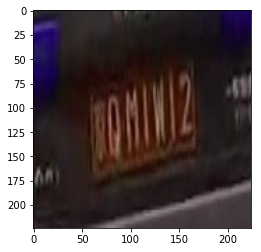

In [25]:
plt.imshow(img)

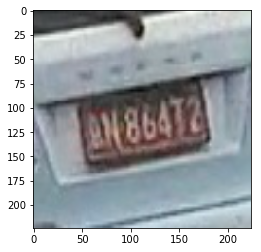

In [26]:
plt.imshow(dp[0])

In [27]:
dp[1]

array([-0.3       , -0.08333333,  0.27      , -0.19444444,  0.31      ,
        0.125     , -0.26      ,  0.23611111])